# Iteration tools
Tools from itertools module

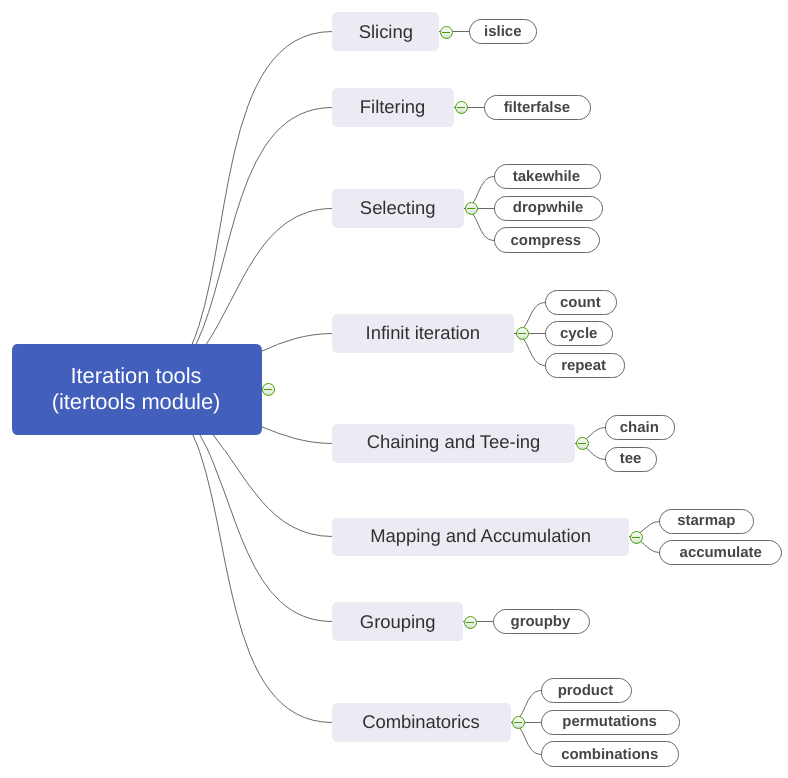

In [1]:
import itertools

<br>

## Slicing using itertools
> Slicing can be achieved in a couple of ways: <br>
> - Common slicing ```seq[1:3]```
> - Using slice() function
>> ```
sl = slice(0,3) 
array[sl]
>>``` <br>
> - using itertool library

Goal: <br>
> Use the slice function from itertools <br>

Challenge: <br>
> Use the slice function from functool to slice list [1,2,3,4] from 0 to 2.

In [ ]:
# Example
# islice advantages:
# Normal slice can't be used with generators
# Lazy iteration property (avoid memory usage)
# Output will be an iterator / generator

l = [1,2,3,4]

result = itertools.islice(l,0,3)
list(result)

In [3]:
# done

Goal: <br>
> Slice a non subscriptable iterable like gerator <br>

Challenge:<br>
> Create a factorial generator called `factorials` that takes as input a sentinel `n` and outputs a generator with factorials using math module. <br>
> Slice the new generator starting with the 3rd element to 10th element.

In [ ]:
# Example
import math 

def factorials(n):
    for i in range(n):
        yield math.factorial(i)
        
facts = factorials(100)

list(itertools.islice(facts, 3, 10))

In [11]:
# done

## Filtering using itertools
> Filter function takes a predicate, applies it to an iterator and filters out False values. <br>
> ```
ls = [1,2,3,4]
list(filter(lambda x: x >2, ls))
out: [3,4]
>```

> In itertools we have a function that filters out True values, the opposite of Filter <br>

Goal: <br>
> Use the itertools function to filter out True values and keep False values

Challenge: <br>
> Create two generators called `gen_1` and `gen_2` with 100 elements. <br>
> Using predicate `predicate = lambda x: x % 2 == 0` filter out odd values and even values. <br>

In [ ]:
# Example

gen_1 = (i for i in range(100+1))
gen_2 = (i for i in range(100+1))
predicate = lambda x: x % 2 == 0

even = list(filter(predicate, gen_1))
odd = list(itertools.filterfalse(predicate, gen_2))

print(even)
print(odd)

In [23]:
# done

<rb>

### Selecting using itertools
Selecting Functions:
> compress() <br>
> takewhile() <br>
> dropwhile()

Challenge 1:
> Create a function called `sine_wave` that takes a value `n` as input. The function computes `n` elements of the sine function and outputs a generator. <br>
> Use takewhile fn to list sine elements between 0 and 0.9 . <br>
> Explain what is the difference between `filter` and `takewhile`? <br>
> Note!: sine fn starts at 0 and peaks at 2 pi. Use math package to compute sine.

In [ ]:
# Example
# takewhile() fn iterates over an object as long as the predicate
# returns True. As soon as the predicate returns False it stops 
# iterating. If the iteration starts with a False predicate then
# function stops at first element and returns an empty object.
import math

def sine_wave(n):
    start = 0 
    max_ = 2 * math.pi
    step = (max_ - start) / (n-1)
    
    for _ in range(n):
        yield round(math.sin(start), 2)
        start +=step
        
print(list(sine_wave(15)))

result = itertools.takewhile(lambda x: 0 <= x <= 0.9, sine_wave(15))
list(result)

In [24]:
# done

[0.0, 0.43, 0.78, 0.97, 0.97, 0.78, 0.43, 0.0, -0.43, -0.78, -0.97, -0.97, -0.78, -0.43, -0.0]


[0.0, 0.43, 0.78]

Challenge 2:
> Use dropwhile to select elements from ls = `[1,3,5,2,1]` that are less than 5. <br>
> Explain how dropwhile works. 

In [ ]:
# Example
# dropwhile() starts element selection when first element evaluates to False
# in our case (5) because 5 < 5 is False, and then returns any other element
# that precedes the predicate.

ls = [1,3,5,2,1]
result = itertools.dropwhile(lambda x: x < 5, ls)
list(result)

In [28]:
# done

Challenge 3:
> Select elements from a list based on truthiness of elements from another list using compress. <br> 
> Create a list with letters from `a` to `e` callend `data`. <br>
> Create a second list called `selectors` = [True, False, 1, 0] <br>
> Explain how compress works.

In [ ]:
# Example
# compress fn returns elements of a list for the elements of `selector`
# that evaluate to True
data = ['a', 'b', 'c', 'd', 'e']
selectors = [True, False, 1, 0] #None for the missing elements

result = itertools.compress(data, selectors)

list(result)

In [30]:
# done

['a', 'c']

<br>

## Infinite iterators using itertools
Infinite iteration functions:
> itertools.count <br>
> itertools.cycle <br>
> itertools.repeat <br>

Challenge 1:
> Create a generator that starts at integer 1 and runs infinitely with a step of 0.2. <br>
> Use itertools slice to list first 10 elements <br>
> Explain how count works. <br>

In [33]:
# Example
# Count is similar with range in functionality however in comparison
# count does not have an end value and it can work with multiple numeric
# types not just integers.

start = 1
step = 0.2
cnt = itertools.count(start,step)

result = itertools.islice(cnt, 0, 10)

list(result)

[1,
 1.2,
 1.4,
 1.5999999999999999,
 1.7999999999999998,
 1.9999999999999998,
 2.1999999999999997,
 2.4,
 2.6,
 2.8000000000000003]

In [34]:
# done

Challenge 2:
> Create a generator that takes an iterable  `colors = ('red', 'blue', 'green')` and repeats the content indefinitely. <br>
> Use islice to select first 5 elements. <br>

In [ ]:
# Example

colors = ('red', 'blue', 'green')
cycle_ = itertools.cycle(colors)
result = itertools.islice(cycle_,5)
list(result)

In [4]:
# done

Challenge 3:
> Create a generator that repeats an element infinitely <br>
> Use islice to select first 5 elements. <br>
> Does repeat refer to the same object?

In [ ]:
# Example

g = itertools.repeat('Python')
list(itertools.islice(g, 5))

# repeat fn creates the same object an infinite number of times

# create a generator for 10 empty lists
ls_gen = itertools.repeat([],10)

# iterate over generator
ls = list(ls_gen)

# append int 10 to index 0 (in first list)
ls[0].append(10)

# All empty lists now have same item because repeat fn 
# has generated the same item (same memory address) 10 times
ls

In [5]:
# done

## Chaining and Teeing
Chaining: 
> Chaining outputs a lazy iterator. Elements parsed to `chain` have to be iterables. <br>
> Sometimes the iterables are contained in a list which have to be unpacked. This presents a problems since the unpacking is an `eager` evaluation contrary to `lazy evaluation`. To circumvent this problem we have to use `chain.from_iterable`, this way the full proccess can be `lazy`.

Tee-ing:
> `Tee-ing` (as in `tee` fn) is an effective way of making copies of iterables. The output is a tuple of lenght n of independent copies of the same iterator. <br>
> This can be really useful when dealing with generators that can be exhausted after iteration.<br>
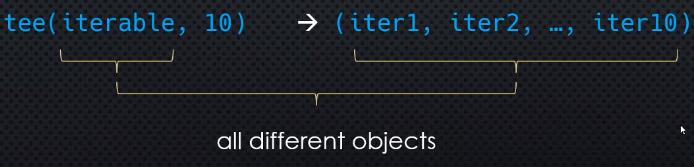

<br>

Challenge 1:
> Create 3 generators named `l1, l2 and l3` with squared numbers. First gen should be a range from 0 to 4, second from 4 to 8 and third from 8 to 12. <br>
> Chain and print all the elements in each of generators.

In [ ]:
# Example

l1 = (i**2 for i in range(4))
l2 = (i**2 for i in range(4,8))
l3 = (i**2 for i in range(8,12))

for item in itertools.chain(l1, l2, l3):
    print(item)

In [5]:
# done

Challenge 2:
> Copy the generators above and create a list called `ls` <br>
> Chain and print the elements in each generator as before.

In [ ]:
# Example
# This approach will allow us to 

l1 = (i**2 for i in range(4))
l2 = (i**2 for i in range(4,8))
l3 = (i**2 for i in range(8,12))

ls = [l1, l2, l3]

for i in itertools.chain.from_iterable(ls):
    print(i)

In [7]:
# done

0
1
4
9
16
25
36
49
64
81
100
121


Challenge 3:
> Create a function `squares` that takes `n` as argument and yields a range of lenght n of squared numbers <br>
> Call the `squares` function with int 10 and assign the output to the var `gen` <br>
> Copy the `gen` object 3 times.

In [ ]:
# Example
# Looking at at the result we can see that iters now
# has 3 diffreent objects with 3 different addresses
# stored into a tuple. The iterators inside the list get
# exhausted after iteration


def squares(n):
    for i in range(n):
        yield i**2
        
gen = squares(10)

iters = itertools.tee(gen, 3)
iters

In [10]:
# done

<br>

## Mapping and accumulation (reduction)
starmap: 

> applies a function on a nested iterable. The computation is applied inside each sub iterable not the whole iterable. The number of the arguments passed in starmap fn has to be equal with the number of elements in sub-iterable. <br>

accumulate:

> the accumulate function is very similar with reduce function however instead of returning the final computation it retunrns the intermediary results. <br>

Challenge 1:
> With `l = [[1,2,3], [3,4,5]]` write a program that computes the sum of elements inside each list using starmap<br>

In [13]:
# Example
l = [[1,2,3], [3,4,5]]
res = itertools.starmap(lambda x,y,z: x + y + z, l)
list(res)

[6, 12]

In [14]:
# done

[6, 12]

Challenge 2:
> create a generator called `sum_` that adds numbers from `ls = [1,2,3,4]` and returns intermediary results 

In [17]:
# Example
ls = [1,2,3,4]
sum_ = itertools.accumulate(ls, lambda x,y: x + y)
list(sum_)

[1, 3, 6, 10]

In [19]:
# done

<br>

## Zipping
zip_longest:
> This form of zipping takes into account the longest sequence allowing for default values where missing. <br>

Challenge 1:
> Create a generator called `gen`  using `shape = ('circle','square','triangle','polygon')` and `sides = (0,3,4)` where each shape has associated the number of sides to it. If no sides exist default to 'unknown' 

In [ ]:
# Example

shape = ('circle','triangle', 'square','polygon')
sides = (0,3,4)

gen = itertools.zip_longest(shape, sides, fillvalue='unknown')

list(gen)

In [22]:
# done

## Grouping
groupby:
> Groupby does not automatically sort the data which means we can have missleading groups if not sorted. Eg: (1,'a'), (2, 'b), (1,'c') will be 3 independent groups NOT 2 as expected. <br>
>

Challenge 1:
> Using a list of tuples `ls = [(1,10,100), (1,11,101), (1,12,102), (2,20,200), (2,21,201), (3,30,300), (3,31,301), (3,32,302)]` create a generator that groups all the tuple elements by the first element in tuple. <br>
> Write a for loop to print the keys and the values.

In [ ]:
# Example

ls = [(1,10,100), (1,11,101), (1,12,102), (2,20,200), (2,21,201), (3,30,300), (3,31,301), (3,32,302)]

gen = itertools.groupby(ls, lambda x: x[0])

for key, value in gen:
    print('key:', key, 'values:', list(value))

In [24]:
ls = [(1,10,100), (1,11,101), (1,12,102), (2,20,200), (2,21,201), (3,30,300), (3,31,301), (3,32,302)]
gen = itertools.groupby(ls, lambda x:x[0])

for k, v in gen:
    print(k,': ', list(v))

1 :  [(1, 10, 100), (1, 11, 101), (1, 12, 102)]
2 :  [(2, 20, 200), (2, 21, 201)]
3 :  [(3, 30, 300), (3, 31, 301), (3, 32, 302)]


Challenge 2:
> Create list comprehension that takes as an input a string `s = 'AAAABBBCCD'` and returns the elements groupped by each letter. <br>
> Note: The output will be a list of lists.

In [28]:
# Example
[''.join(g) for k, g in itertools.groupby('AAAABBBCCD')]

['AAAA', 'BBB', 'CC', 'D']

In [27]:
# done

Challenge 3:
> Using the csv file `file = '08 - Grouping/cars_2014.csv'`, create a program that prints a dictionary with the make as key and number of occurences as values using `groupby` function. <br>
Output: `{'ACCURA: 6', 'ALFA ROMEO: 2', ...}`

In [ ]:
# Example
with open('08 - Grouping/cars_2014.csv') as f:
    next(f)
    make_groups = {k:len(list(v)) 
                   for k,v in itertools.groupby(f, key=lambda x: x.split(',')[0])}
make_groups

In [34]:
# done

## Combinatorics
Cartesian product:
> product fn will compute cartesian product of two iterables. Eg: (1,a) and (2,b) => (1,2), (1,b), (a,2), (a,b) <br>
> The advantage of this approach is that the product fn can create a cartesian product out of any number of iterables

Permutations:
> permutation fn computes all the possible options just like in math. <br>
> Note!: If the iterable passed on to the permutation fn contains duplicate the result will contain duplicates, it does not create a curated set for us.

Combinations:
> combination fn computes combinations as in stats. <br>
> The order of elements is not considered <br>
> Has the option to use replacement in which case the values drawn won't be repeated. <br>

<br>

Challenge 1:
> compute catesian product of `a = (1,2,3), b = ('a', 'b', 'c')`

In [ ]:
# Example
a = (1,2,3)
b = ('a', 'b', 'c')

list(itertools.product(a,b))

In [38]:
# done

Challenge 2:
> createa a function `grid` that has 3 positional arguments `min_val, max_val, step` and a default argument `num_dimensions=2`. <br> 
> The function will compute a coordinate grid of elements for a variable number of dimensions which ranges from min_val to max_val in any step not just int.  <br>

- Constraints:
> don't allow more than 3 positional arguments <br>
> use as much as possible the itertools module <br>

Output:
```
>>> grid(1, 2, 1, num_dimensions=3)
[(1, 1, 1),
 (1, 1, 2),
 (1, 2, 1),
 (1, 2, 2),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 1),
 (2, 2, 2)]
```

In [ ]:
# Example
def grid(min_val, max_val, step, *, num_dimensions=2):
    # count: starts iteration from min_val to infinity where step can be != int
    cnt = itertools.count(min_val, step)
    # stop iteration at max val
    axis = itertools.takewhile(lambda x: x <= max_val, cnt)
    # create n number of dimensions
    dim = itertools.tee(axis, num_dimensions)
    # create the grid (cartesian product of dimensions)
    axes = itertools.product(*dim)
    
    yield from axes

result = grid(1, 2, 1, num_dimensions=3)
list(result)

In [58]:
# done

Challenge 3:
> crate a function `dice_proba` that takes as an input a number `n` between 1 and 12 and computes the probability of rolling number `n` using itertools and a brute force approach.

In [59]:
# Example

def dice_proba(n):
    # Compute sample_space (all possible combinations)
    sample_space = list(itertools.product(*itertools.tee(range(1,7),2)))
    # Compute possible outcomes
    outcomes = list(filter(lambda x: x[0] + x[1] == n, sample_space))
    return len(outcomes) / len(sample_space)

dice_proba(8)

0.1388888888888889

In [60]:
# done

Challenge 4:
> Create a function `perms` that takes in a string of 3 chars and computes all the permutations. The output should be a generator.

In [ ]:
# Example

def perms(s):
    yield from itertools.permutations(s)

list(perms('abc'))

In [61]:
   # done

Challenge 5:
> Create a function `combi` that takes a string of 4 chars and computes all the combinations of 3. The output should be a generator.

In [ ]:
# Example

def combi(s, r):
    yield from itertools.combinations(s, r)
    
list(combi('abcd', 3))

In [62]:
# done

# Itertools challanges: 
> https://www.w3resource.com/python-exercises/itertools/index.php

1. Write a Python program to create an iterator from several iterables in a sequence and display the type and elements of the new iterator.

In [7]:
def chaining(*args):
    yield from itertools.chain(*args)
    
ls = [1,2,3]
tp = ('a','b','c')

res = chaining(ls, tp)
list(res)

[1, 2, 3, 'a', 'b', 'c']

2. Write a Python program to generate the running product of the elements of an given iterable.

In [9]:
def running_prod(iterable):
    yield from itertools.accumulate(iterable)
    
itr = [1,2,3,4,5]
res = running_prod(itr)
list(res)

[1, 3, 6, 10, 15]

3. Write a Python program to generate the running maximum, minimum value of the elements of an iterable.

In [14]:
ls = [1,3,2,7,9,8,10,11,12,0,14,11,12,7]
max_ = itertools.accumulate(ls, max)
print(list(max_))

min_ = itertools.accumulate(ls, min)
print(list(min_))

[1, 3, 3, 7, 9, 9, 10, 11, 12, 12, 14, 14, 14, 14]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


4. Write a Python program to construct an infinite iterator that returns evenly spaced values starting with a specified number and step.

In [15]:
infinite_iter = itertools.count(5,1.2)

res = itertools.islice(infinite_iter, 0, 10)
list(res)

[5,
 6.2,
 7.4,
 8.6,
 9.799999999999999,
 10.999999999999998,
 12.199999999999998,
 13.399999999999997,
 14.599999999999996,
 15.799999999999995]

5. Write a Python program to generate an infinite cycle of elements from an iterable.

In [18]:
ls = ('red','blue','green')

cycle_ = itertools.cycle(ls)
res = itertools.islice(cycle_, 0, 9)
list(res)

['red', 'blue', 'green', 'red', 'blue', 'green', 'red', 'blue', 'green']

6. Write a Python program to make an iterator that drops elements from the iterable as soon as an element is a positive number.

In [28]:
ls = list(range(-5,6))
res = itertools.takewhile(lambda x: x < 0, ls)
list(res)

[-5, -4, -3, -2, -1]

7. Write a Python program to make an iterator that drops elements from the iterable as long as the elements are negative; afterwards, returns every element.

In [31]:
ls = list(range(-5,6))
res = itertools.dropwhile(lambda x: x < 0, ls)
list(res)

[0, 1, 2, 3, 4, 5]

8. Write a Python program to create an iterator that returns consecutive keys and groups from an iterable

In [38]:
str1 = 'AAAAJJJJHHHHNWWWEERRRSSSOOIIU'
grouped = itertools.groupby(str1)
{k:''.join([*v]) for k,v in grouped}

{'A': 'AAAA',
 'J': 'JJJJ',
 'H': 'HHHH',
 'N': 'N',
 'W': 'WWW',
 'E': 'EE',
 'R': 'RRR',
 'S': 'SSS',
 'O': 'OO',
 'I': 'II',
 'U': 'U'}

9. Write a Python program to split an iterable and generate iterables specified number of times.

In [56]:
s = 'Python'
res = itertools.tee(s,5)
[''.join(list(i)) for i in res]

['Python', 'Python', 'Python', 'Python', 'Python']

10. Write a Python program to create an iterator to get specified number of permutations of elements

In [12]:
def permutations(iterable, r):
    yield from itertools.permutations(iterable, r)
    
for i in permutations('abcd', 3):
    print(i)

('a', 'b', 'c')
('a', 'b', 'd')
('a', 'c', 'b')
('a', 'c', 'd')
('a', 'd', 'b')
('a', 'd', 'c')
('b', 'a', 'c')
('b', 'a', 'd')
('b', 'c', 'a')
('b', 'c', 'd')
('b', 'd', 'a')
('b', 'd', 'c')
('c', 'a', 'b')
('c', 'a', 'd')
('c', 'b', 'a')
('c', 'b', 'd')
('c', 'd', 'a')
('c', 'd', 'b')
('d', 'a', 'b')
('d', 'a', 'c')
('d', 'b', 'a')
('d', 'b', 'c')
('d', 'c', 'a')
('d', 'c', 'b')


In [18]:
f'{ord('a')}

97

In [6]:
from itertools import starmap

def number(bus_stops):
    return sum(starmap(lambda x,y: x-y, bus_stops))
    
number([[10,0],[3,5],[5,8]])

5